We will be using MNIST Database

In [5]:
from keras.datasets import mnist

In [6]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


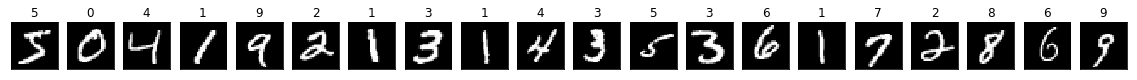

In [9]:
# Visualize some of the downloaded data
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(20):
    ax = fig.add_subplot(1,20,i+1,xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

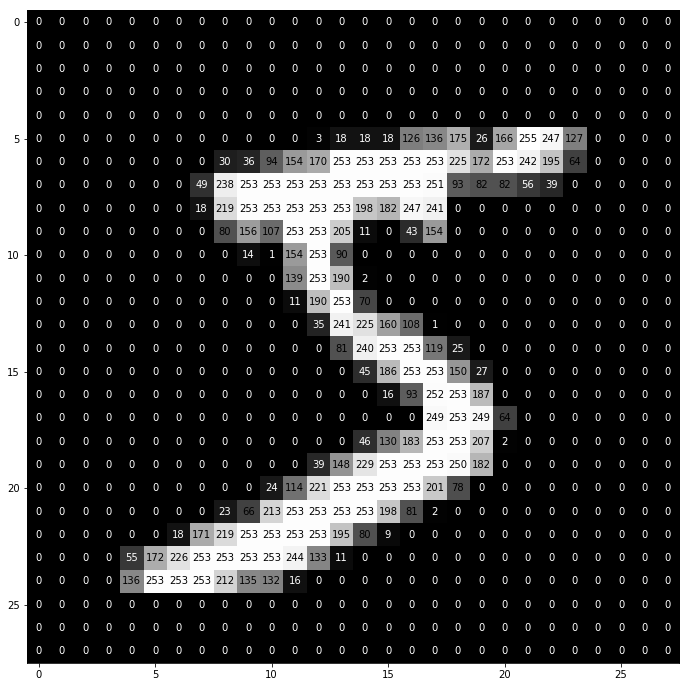

In [13]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/4.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [14]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

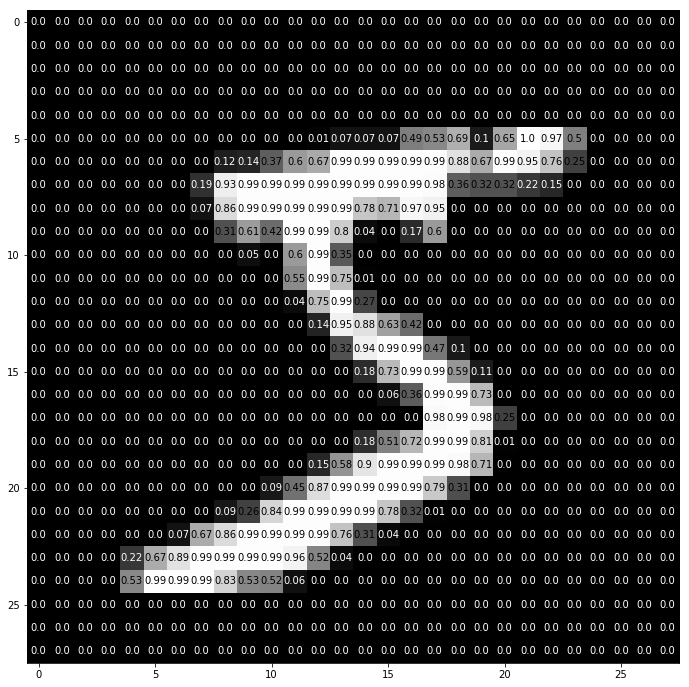

In [15]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [16]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [19]:
# if our model plainy remembers training
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 8.2100%


In [20]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.2727 - acc: 0.9157 - val_loss: 0.1135 - val_acc: 0.9655

Epoch 00001: val_loss improved from inf to 0.11346, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.1133 - acc: 0.9648 - val_loss: 0.1080 - val_acc: 0.9687

Epoch 00002: val_loss improved from 0.11346 to 0.10804, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 8s 167us/step - loss: 0.0794 - acc: 0.9751 - val_loss: 0.0797 - val_acc: 0.9761

Epoch 00003: val_loss improved from 0.10804 to 0.07965, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 9s 177us/step - loss: 0.0632 - acc: 0.9813 - val_loss: 0.0940 - val_acc: 0.9756

Epoch 00004: val_loss did not improve from 0.07965
Epoch 5/10
48000/48000 [==============================] - 8s 177u

In [21]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [23]:
# Lets run it on the test set!!
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.7000%


Pretty good accuracy!!